In [1]:
import netCDF4
import pytide
import xarray as xr

In [2]:
ds=xr.open_dataset("/scratch/cnt0024/hmg2840/albert7a/DEV/git/pangeo-pytide/tests/dataset/fes_tide_time_series.nc") 

In [3]:
h=ds.ocean


In [4]:
with netCDF4.Dataset("/scratch/cnt0024/hmg2840/albert7a/DEV/git/pangeo-pytide/tests/dataset/fes_tide_time_series.nc") as dataset:
    time = dataset['time'][:] * 1e-6    # microseconds to epoch


In [5]:
t = time.astype('datetime64[s]')

In [6]:
t

masked_array(data=['2018-01-01T00:00:00', '2018-01-01T00:01:00',
                   '2018-01-01T00:02:00', ..., '2018-12-31T23:57:00',
                   '2018-12-31T23:58:00', '2018-12-31T23:59:00'],
             mask=False,
       fill_value=numpy.datetime64('NaT'),
            dtype='datetime64[s]')

In [7]:
wt = pytide.WaveTable()

In [8]:
wt = pytide.WaveTable(["M2", "K1", "O1", "P1", "Q1", "S1"])

In [9]:
wt

pytide.WaveTable(M2, K1, O1, P1, Q1, S1)

In [10]:
f, vu = wt.compute_nodal_modulations(t)

In [11]:
w = wt.harmonic_analysis(h, f, vu)

In [12]:
w

array([-0.1087339 +0.43314857j,  0.10699727-0.01580139j,
        0.00859424-0.01403558j,  0.03023772-0.00653767j,
       -0.00334336+0.00384013j, -0.0012667 +0.0052426j ])

In [13]:
hp = wt.tide_from_tide_series(time, w)

In [14]:
hp

array([0.2302982 , 0.23391025, 0.23751245, ..., 0.54289843, 0.54140741,
       0.53988409])

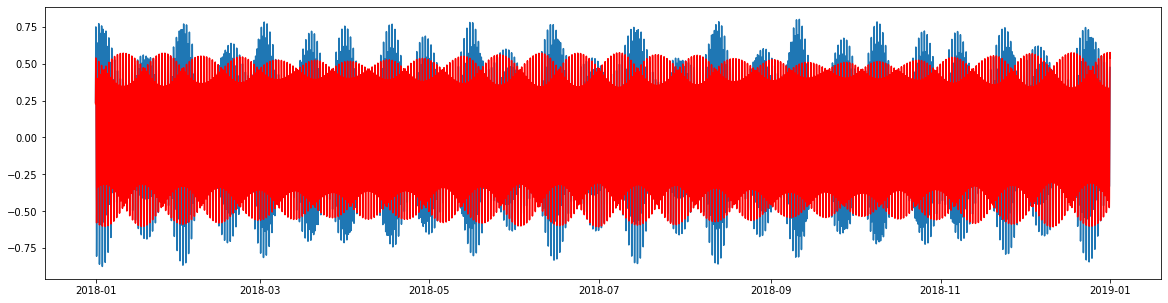

In [16]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,5))
plt.plot(t,h)
plt.plot(t,hp,'r')

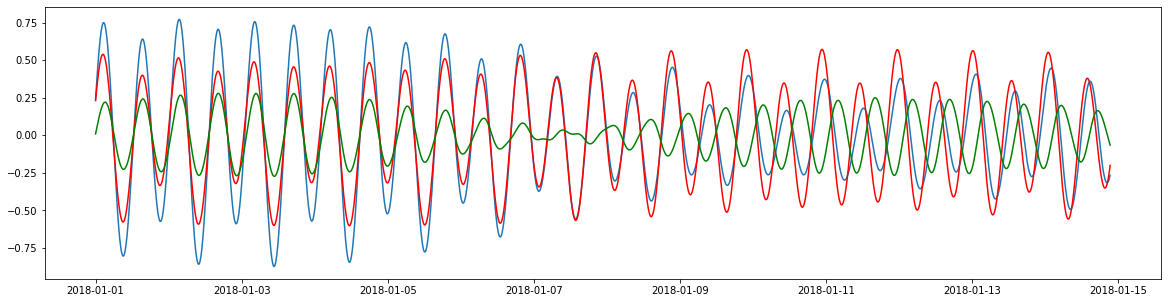

In [17]:
fig=plt.figure(figsize=(20,5))
plt.plot(t[0:20000],h[0:20000])
plt.plot(t[0:20000],hp[0:20000],'r')
plt.plot(t[0:20000],h[0:20000]-hp[0:20000],'g')


In [18]:
import sys
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/xscale")
import xscale

import xscale.spectral.fft as xfft
from xscale.spectral.tools import plot_spectrum
import xscale.signal.generator as xgen


In [19]:
NPADDING = 2
SPtime_h = xfft.fft(h,dim='time', dx=1., detrend='mean',nfft=h.shape[0]*NPADDING,tapering=True)


In [20]:
MEANPSD_h=xfft.psd(SPtime_h).load()
freqs_h=MEANPSD_h.f_time.values
freqs_h = freqs_h[NPADDING::] 


Text(0.5, 1.0, 'Temporal Spectrum of FES SSH time serie')

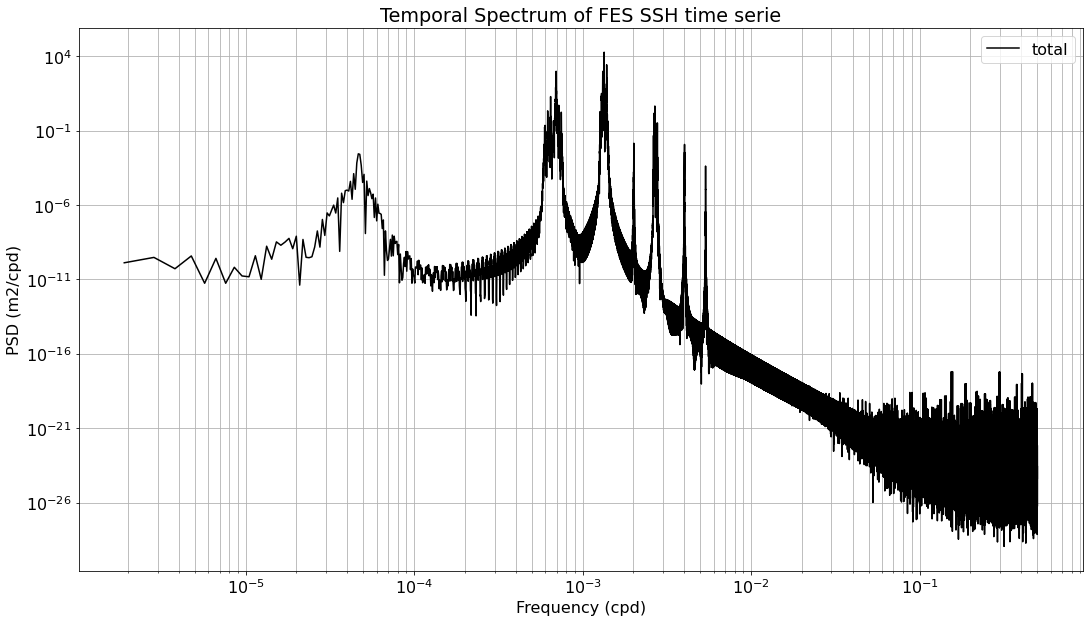

In [21]:
import matplotlib.pyplot as plt
params = {'figure.figsize' : (18, 10),'legend.fontsize': 16,'xtick.labelsize':16,'ytick.labelsize':16,'axes.labelsize':16,'font.size':16}
plt.rcParams.update(params)
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)

ax.loglog(freqs_h,MEANPSD_h[NPADDING::],'k',label='total')
#ax.set_xlim(1e-3,1)
ax.grid(which='both',axis='both')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (m2/cpd)')
plt.legend()
plt.title('Temporal Spectrum of FES SSH time serie')

In [22]:
hp_da=xr.DataArray(hp,dims='time')

In [23]:
hp_da

<xarray.DataArray (time: 525600)>
array([0.2302982 , 0.23391025, 0.23751245, ..., 0.54289843, 0.54140741,
       0.53988409])
Dimensions without coordinates: time

In [24]:
NPADDING = 2
SPtime_hp = xfft.fft(hp_da,dim='time', dx=1., detrend='mean',nfft=hp_da.shape[0]*NPADDING,tapering=True)
MEANPSD_hp=xfft.psd(SPtime_hp).load()
freqs_hp=MEANPSD_hp.f_time.values
freqs_hp = freqs_hp[NPADDING::] 


Text(0.5, 1.0, 'Temporal Spectrum of FES SSH time serie')

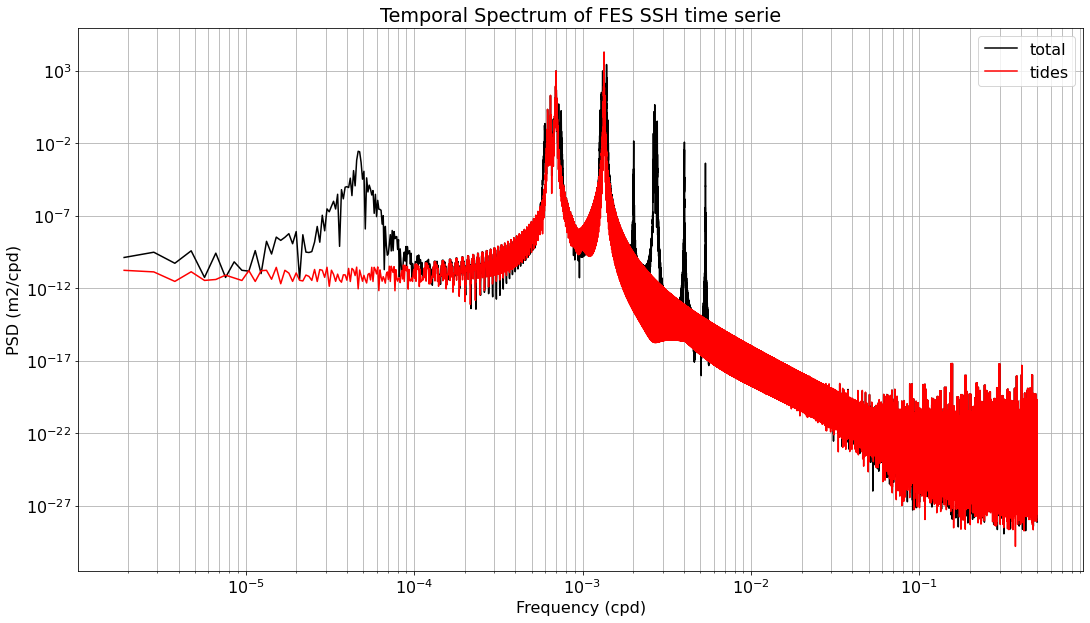

In [25]:
import matplotlib.pyplot as plt
params = {'figure.figsize' : (18, 10),'legend.fontsize': 16,'xtick.labelsize':16,'ytick.labelsize':16,'axes.labelsize':16,'font.size':16}
plt.rcParams.update(params)
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)

ax.loglog(freqs_h,MEANPSD_h[NPADDING::],'k',label='total')
ax.loglog(freqs_hp,MEANPSD_hp[NPADDING::],'r',label='tides')
#ax.set_xlim(1e-3,1)
ax.grid(which='both',axis='both')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (m2/cpd)')
plt.legend()
plt.title('Temporal Spectrum of FES SSH time serie')

In [26]:
hm=h-hp_da


In [27]:
hm

<xarray.DataArray (time: 525600)>
array([ 0.00888085,  0.01051039,  0.01214157, ..., -0.06951366,
       -0.06764712, -0.06577621])
Coordinates:
  * time     (time) float64 1.515e+15 1.515e+15 ... 1.546e+15 1.546e+15

In [28]:
NPADDING = 2
SPtime_hm = xfft.fft(hm,dim='time', dx=1., detrend='mean',nfft=hm.shape[0]*NPADDING,tapering=True)
MEANPSD_hm=xfft.psd(SPtime_hm).load()
freqs_hm=MEANPSD_hm.f_time.values
freqs_hm = freqs_hm[NPADDING::] 


Text(0.5, 1.0, 'Temporal Spectrum of FES SSH time serie')

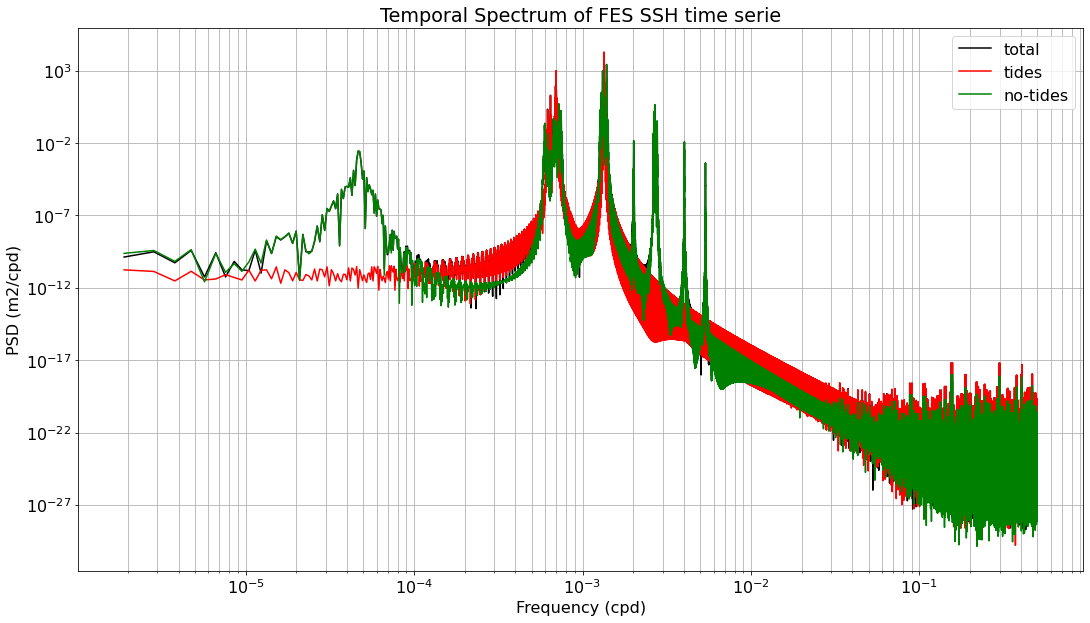

In [29]:
import matplotlib.pyplot as plt
params = {'figure.figsize' : (18, 10),'legend.fontsize': 16,'xtick.labelsize':16,'ytick.labelsize':16,'axes.labelsize':16,'font.size':16}
plt.rcParams.update(params)
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)

ax.loglog(freqs_h,MEANPSD_h[NPADDING::],'k',label='total')
ax.loglog(freqs_hp,MEANPSD_hp[NPADDING::],'r',label='tides')
ax.loglog(freqs_hm,MEANPSD_hm[NPADDING::],'g',label='no-tides')
#ax.set_xlim(1e-3,1)
ax.grid(which='both',axis='both')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (m2/cpd)')
plt.legend()
plt.title('Temporal Spectrum of FES SSH time serie')

Text(0.5, 1.0, 'Temporal Spectrum of FES SSH time serie')

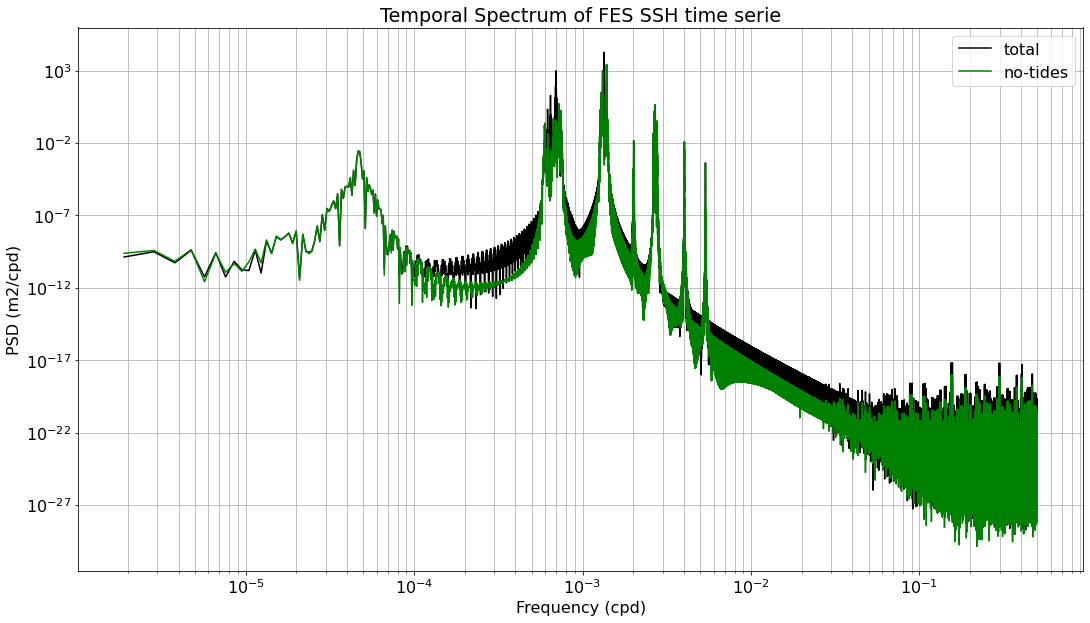

In [30]:
import matplotlib.pyplot as plt
params = {'figure.figsize' : (18, 10),'legend.fontsize': 16,'xtick.labelsize':16,'ytick.labelsize':16,'axes.labelsize':16,'font.size':16}
plt.rcParams.update(params)
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)

ax.loglog(freqs_h,MEANPSD_h[NPADDING::],'k',label='total')
#ax.loglog(freqs_hp,MEANPSD_hp[NPADDING::],'r',label='tides')
ax.loglog(freqs_hm,MEANPSD_hm[NPADDING::],'g',label='no-tides')
#ax.set_xlim(1e-3,1)
ax.grid(which='both',axis='both')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (m2/cpd)')
plt.legend()
plt.title('Temporal Spectrum of FES SSH time serie')